<a href="https://colab.research.google.com/github/puttadharani/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/data_email_campaign.csv')
df

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [4]:
68353*0.08

5468.24

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [6]:
df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [7]:
68353*0.08

5468.24

In [8]:
df.isna().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [9]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


<Axes: >

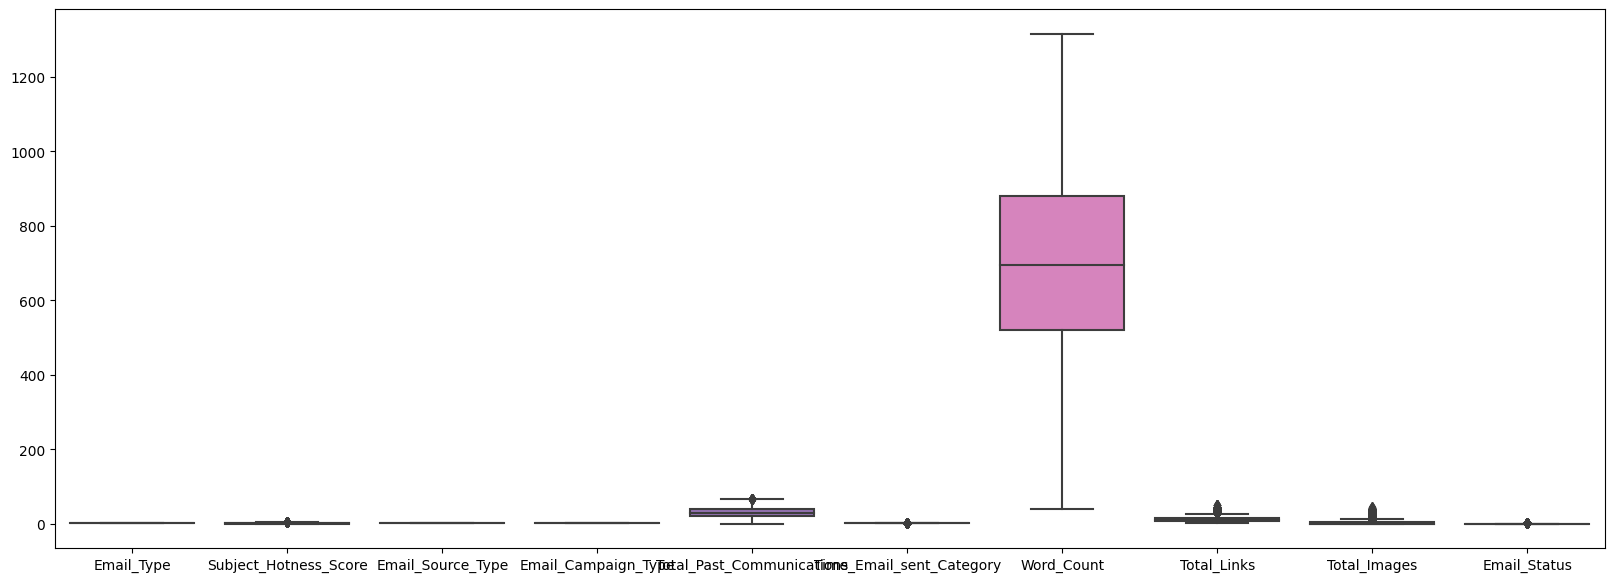

In [10]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.boxplot(df)

In [11]:
for i in ['Customer_Location','Total_Past_Communications','Total_Links','Total_Images']:
  print(df[i].value_counts())

G    23173
E    10193
D     7406
C     5758
F     4433
B     4341
A     1454
Name: Customer_Location, dtype: int64
30.0    2990
20.0    2925
25.0    2391
40.0    2251
35.0    1881
        ... 
63.0      40
64.0      36
65.0      33
66.0      18
67.0       9
Name: Total_Past_Communications, Length: 64, dtype: int64
11.0    11400
6.0     10644
4.0      7274
9.0      5824
8.0      5651
14.0     4967
21.0     4372
16.0     3922
5.0      2056
2.0      1357
3.0      1341
7.0      1129
31.0     1106
26.0      863
18.0      841
1.0       706
19.0      616
13.0      444
10.0      435
24.0      338
12.0      247
28.0      161
41.0      144
36.0       71
29.0       63
15.0       56
23.0       21
46.0       20
17.0       18
34.0       14
39.0       13
20.0       10
33.0        8
25.0        7
49.0        6
22.0        5
44.0        2
Name: Total_Links, dtype: int64
0.0     35060
2.0      3331
3.0      3164
1.0      3024
4.0      2907
5.0      2732
6.0      2133
7.0      2107
8.0      1804
10.0    

In [12]:
df['Customer_Location'].fillna('G',inplace=True)
df['Total_Past_Communications']=df['Total_Past_Communications'].fillna(df['Total_Past_Communications'].median())
df['Total_Links']=df['Total_Links'].fillna(df['Total_Links'].median())
df['Total_Images']=df['Total_Images'].fillna(df['Total_Images'].median())

In [13]:
df.isna().sum()

Email_ID                     0
Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Customer_Location            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

In [14]:
df['Customer_Location'].fillna('G',inplace=True)

In [15]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,G,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df['Customer_Location']=le.fit_transform(df[['Customer_Location']])
df

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,4,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,6,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,1,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,4,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,2,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,5,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,2,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,6,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,4,2,50.0,1,733,14.0,4.0,0


In [18]:
independent_features=df.iloc[:,1:-1]
independent_features

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images
0,1,2.2,2,4,2,33.0,1,440,8.0,0.0
1,2,2.1,1,6,2,15.0,2,504,5.0,0.0
2,2,0.1,1,1,3,36.0,2,962,5.0,0.0
3,1,3.0,2,4,2,25.0,2,610,16.0,0.0
4,1,0.0,2,2,3,18.0,2,947,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...
68348,2,0.4,1,5,2,22.0,3,737,16.0,13.0
68349,1,1.3,1,2,2,40.0,2,653,31.0,16.0
68350,1,2.2,2,6,2,33.0,2,490,9.0,0.0
68351,1,0.4,1,4,2,50.0,1,733,14.0,4.0


In [19]:
dependent_features=df.iloc[:,-1]
dependent_features


0        0
1        0
2        1
3        0
4        0
        ..
68348    0
68349    0
68350    0
68351    0
68352    0
Name: Email_Status, Length: 68353, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
import pickle
ss=StandardScaler()
x=ss.fit_transform(independent_features)

In [21]:
file=open('/content/drive/MyDrive/deploy_here/deploy_here.pkl','wb')
pickle.dump(ss,file)
file.close()

<Axes: >

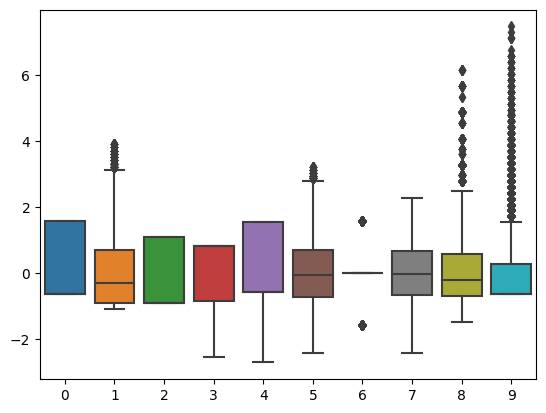

In [22]:
sns.boxplot(x)

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,dependent_features,test_size=0.25,random_state=3)
x_train.shape

(51264, 10)

In [24]:
x_test.shape

(17089, 10)

In [25]:
y_train.shape

(51264,)

In [26]:
y_test.shape

(17089,)

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='ovr',solver='lbfgs')

In [28]:
lr.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [29]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.7995201591667155

In [31]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89     16758
           1       0.05      0.45      0.09       331
           2       0.00      0.00      0.00         0

    accuracy                           0.80     17089
   macro avg       0.35      0.42      0.33     17089
weighted avg       0.97      0.80      0.87     17089



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
confusion_matrix(y_pred,y_test)

array([[13514,  2671,   573],
       [  138,   149,    44],
       [    0,     0,     0]])

In [33]:
y_pred.shape

(17089,)

In [34]:
import pickle
file=open('/content/drive/MyDrive/deploy_here/classification.pkl','wb')
pickle.dump(lr,file)
file.close()